In [1]:
from tester import StrategyTester
from parameter_optimizer import optimize_parameters, plot_parameter_sensitivity
from strategies.overnight_gap_mean_reverse.variant_1 import overnight_gap_mean_reverse


In [19]:
tester_config = {
    "symbols": ["SPY"],
    "start_date": (2018, 1, 1),
    "end_date": (2019, 1, 1),
    "initial_cash": 100000,
    "resolution": 'minute',
    "benchmark_symbol": 'SPY'  # Optional: compare to benchmark
}


param_grid = {
    'volatility_window': [15, 30, 60, 90],  # 60 periods rolling window for volatility
    'sigma': [1.0, 2.0, 3.0, 5.0, 8.0, 10.0],
    'exit_minutes_after_open': [15, 30, 45, 60, 90, 120]
}

In [ ]:
results = optimize_parameters(
    tester_config,
    overnight_gap_mean_reverse,
    param_grid,
    metric='sharpe_ratio'
)


▶ Coordinate Descent Optimization
   Optimizing for: sharpe_ratio
   Parameters: volatility_window, sigma, exit_minutes_after_open
   Initial defaults: {'volatility_window': 60, 'sigma': 5.0, 'exit_minutes_after_open': 60}

--- Pass 1 ---
  Optimizing volatility_window... 
 
▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

best = 15.0 (sharpe_ratio = 7.1643)

  Optimizing sigma... 
 
▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete
⚠ No trades executed

best = 5.0 (sharpe_ratio = 7.1643)

  Optimizing exit_minutes_after_open... 
 
▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

▶ 

In [23]:
# View top 10 results
print("\nTop 10 Parameter Combinations:")
results[['volatility_window', 'sigma', 'exit_minutes_after_open',
               'sharpe_ratio', 'total_return', 'max_drawdown', 'win_rate']].head(10)



Top 10 Parameter Combinations:


,volatility_window,sigma,exit_minutes_after_open,sharpe_ratio,total_return,max_drawdown,win_rate
8,15.0,5.0,15.0,13.401280,0.011279,-0.004411,0.750000
0,15.0,5.0,60.0,7.164326,0.008399,-0.014445,0.625000
9,15.0,5.0,30.0,5.306260,0.003764,-0.008904,0.625000
14,60.0,5.0,15.0,4.131903,0.021111,-0.009421,0.604167
13,30.0,5.0,15.0,2.813478,0.015170,-0.010831,0.531915
1,30.0,5.0,60.0,2.645453,0.019397,-0.015671,0.531915
15,90.0,5.0,15.0,2.370375,0.011574,-0.014129,0.549020
10,15.0,5.0,45.0,2.266350,0.003484,-0.013315,0.625000
2,60.0,5.0,60.0,1.684923,0.015354,-0.025011,0.500000
6,15.0,3.0,60.0,1.595869,0.039298,-0.027583,0.496183


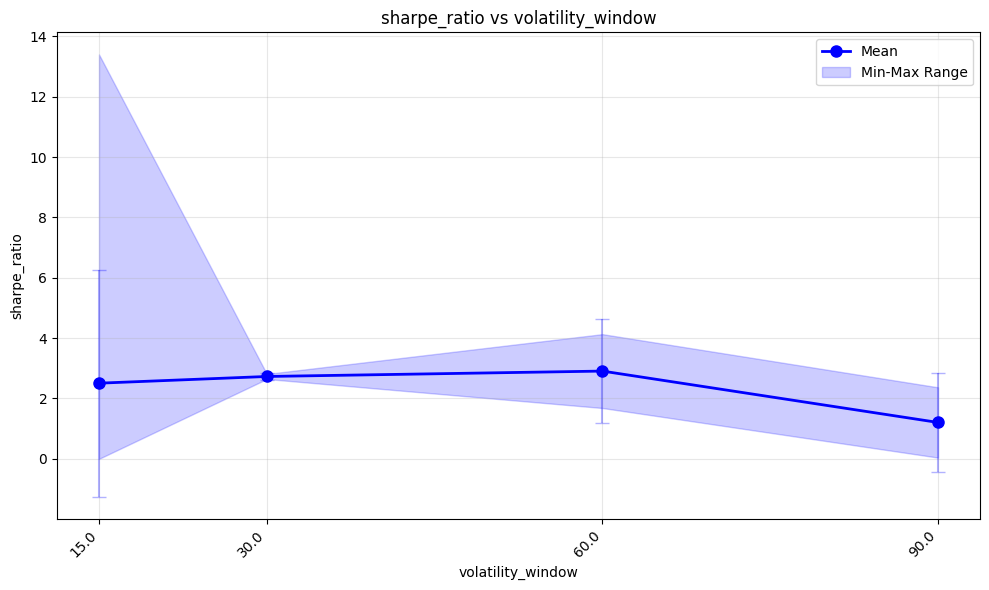

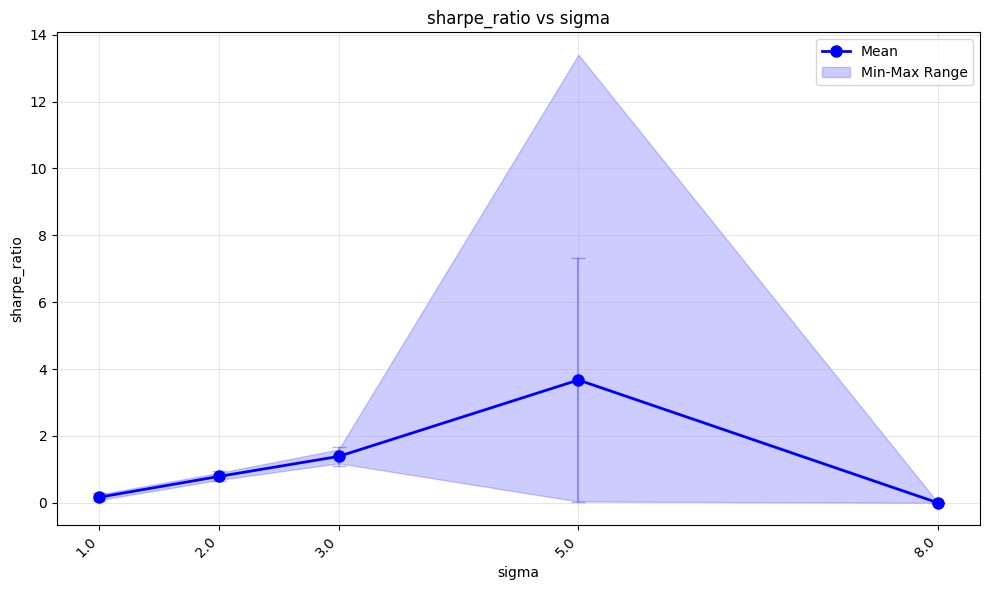

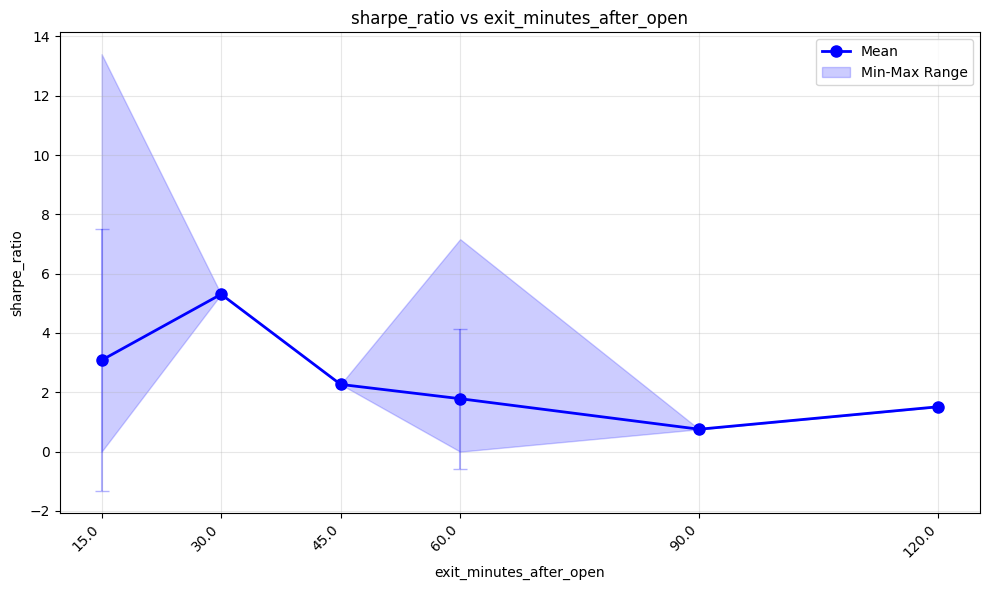

In [ ]:
plot_parameter_sensitivity(results, 'volatility_window', 'sharpe_ratio')
plot_parameter_sensitivity(results, 'sigma', 'sharpe_ratio')
plot_parameter_sensitivity(results, 'exit_minutes_after_open', 'sharpe_ratio')

### Observations

- Looking at the "Top 10 Parameter Combinations", a volatility window of 15 minutes seems to greatly improve our win rate and our sharpe ratio

- The main parameter influencing performances is sigma. The optimal values is for sigma = 5.0. However this is a red flag because this means that our strategy is not robust to parameters changes. On the others side, we already expected sigma to be the most determinent parameters because this parameter is the core value of our strategy (identifying over expected night gap and bet on mean reversion)

- exit_minutes_after_open doesn't seems to significantly impact performances. We will keep it minimal to 15 minutes, to limit exposure and because this is the best combinations we have observed


### Next steps:

- The number of total trade for 1 asset is very low because we wait for unexpected gap.
- By adding more assets we hope to:
    1. Confirm the generalization of performances to others assets
    2. Reduce variance of results and so risk
    3. Multiply the total return 

- We start with a small set of assets and then a larger one.

In [ ]:
symbols = ['SPY', 'QQQ', 'IWM', 'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'META', 'JPM', 'XOM']

tester_config = {
    "symbols": symbols,
    "start_date": (2018, 1, 1),
    "end_date": (2019, 1, 1),
    "initial_cash": 100000,
    "resolution": 'minute',
    "benchmark_symbol": 'SPY'  # Optional: compare to benchmark
}

In [9]:
tester = StrategyTester(
    **tester_config
)

In [10]:
params = {
    'volatility_window': 15, 
    'sigma': 5.0, 
    'exit_minutes_after_open': 15
}



▶ Running backtest...
✓ Backtest complete


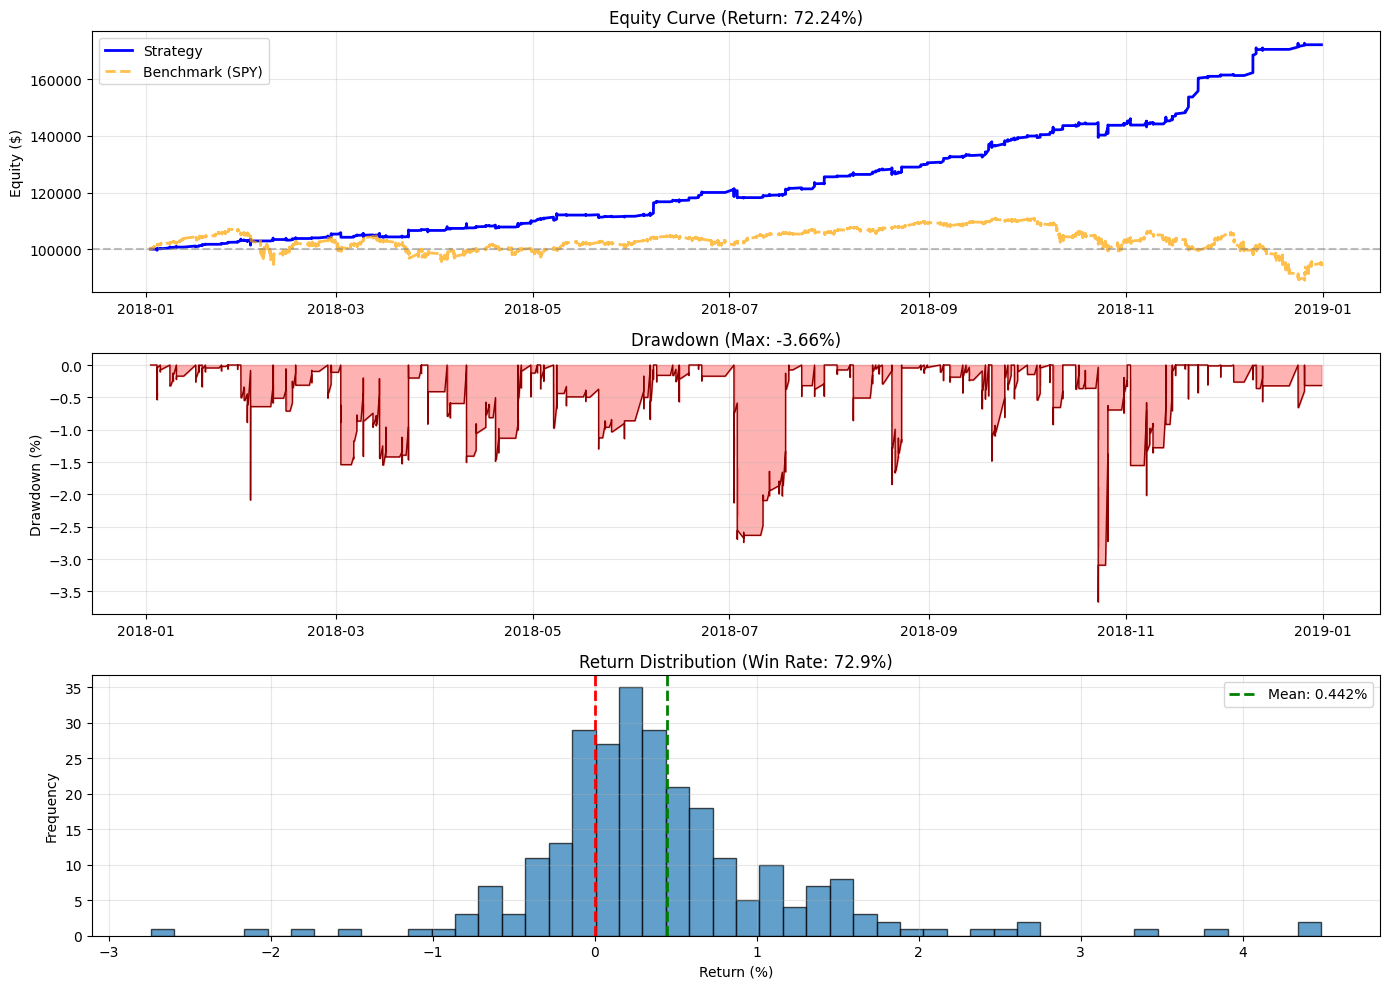


STRATEGY PERFORMANCE
Total Return:        72.24%
Sharpe Ratio:         7.36
Max Drawdown:        -3.66%
Calmar Ratio:        19.72

Total Trades:          262
Win Rate:             72.9%
Profit Factor:        4.87

Average Return:      0.442%
Average Win:         0.783%
Average Loss:       -0.432%
Best Trade:           4.49%
Worst Trade:         -2.74%



In [11]:
tester.run(overnight_gap_mean_reverse, params)
stats = tester.get_stats(plot=True)
tester.print_stats(stats)

In [12]:
# Major indices (highly liquid)
etfs = ['SPY', 'QQQ', 'IWM', 'DIA', 'SPY']

# Top S&P 500 stocks by liquidity
sp500_leaders = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 
                 'BRK.B', 'V', 'XOM', 'JNJ', 'JPM', 'WMT', 'MA', 'PG',
                 'UNH', 'HD', 'DIS', 'BAC', 'VZ', 'ADBE', 'CRM', 'CVX',
                 'NFLX', 'COST', 'ABBV', 'MRK', 'PEP', 'TMO', 'ACN']

# NASDAQ 100 top holdings
nasdaq_leaders = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'META', 'TSLA',
                  'AVGO', 'COST', 'ADBE', 'NFLX', 'PEP', 'AMD', 'QCOM',
                  'ISRG', 'CMCSA', 'INTC', 'INTU', 'AMAT', 'BKNG']

# Combine them (remove duplicates)
all_symbols = list(set(sp500_leaders + nasdaq_leaders + etfs))

tester_config = {
    "symbols": all_symbols,
    "start_date": (2018, 1, 1),
    "end_date": (2019, 1, 1),
    "initial_cash": 100000,
    "resolution": 'minute',
    "benchmark_symbol": 'SPY'  # Optional: compare to benchmark
}

In [13]:
tester = StrategyTester(
    **tester_config
)

In [14]:
params = {
    'volatility_window': 15, 
    'sigma': 5.0, 
    'exit_minutes_after_open': 15
}



▶ Running backtest...
✓ Backtest complete


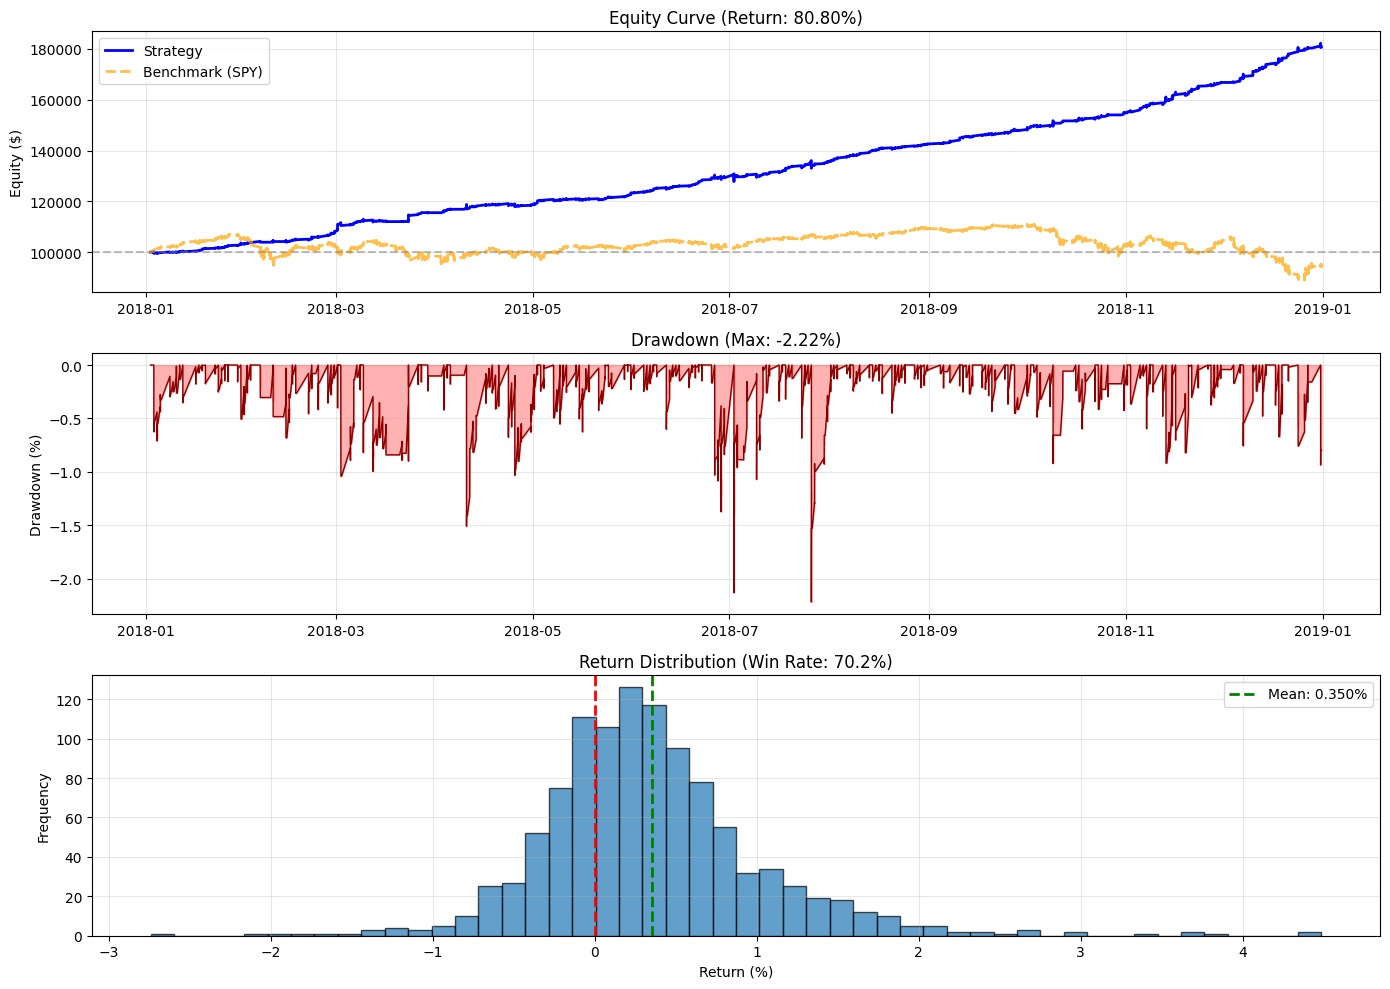


STRATEGY PERFORMANCE
Total Return:        80.80%
Sharpe Ratio:         7.98
Max Drawdown:        -2.22%
Calmar Ratio:        36.43

Total Trades:         1074
Win Rate:             70.2%
Profit Factor:        4.95

Average Return:      0.350%
Average Win:         0.637%
Average Loss:       -0.343%
Best Trade:           4.49%
Worst Trade:         -2.74%



In [15]:
tester.run(overnight_gap_mean_reverse, params)
stats = tester.get_stats(plot=True)
tester.print_stats(stats)

### Observations


- The sharp ratio tend to stabilize around 7
- The win rate is still quite similar (70-75%)
- the number of total returns augmented up to (70-80%). NB: We cannot go further because we trade almost everydays now. 

These are strong signals that the strategy generalize to others assets.


### Next steps

We can go to a validation phase by expanding the universe we are trading in and testing the strategy accross different regimes.

